<a href="https://colab.research.google.com/github/arjunram07/CH5019-MFDS_TermProject/blob/master/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


## Dataset

In [ ]:
data=pd.read_csv('func_app2.csv')
data.shape

(500, 3)

In [ ]:
data.head()

,x1,x2,y
0,4.321098,4.769609,19.668616
1,1.969915,1.870509,4.793395
2,3.455278,3.402386,12.005434
3,0.939487,0.980525,1.572847
4,0.363062,0.667448,0.514955


In [ ]:
data.describe()

,x1,x2,y
count,500.000000,500.000000,500.000000
mean,2.971419,3.062621,12.294973
std,1.716436,1.728849,10.635950
min,0.010475,0.014393,0.014708
25%,1.503147,1.575446,2.725777
50%,3.047999,3.161545,9.873810
75%,4.398037,4.544915,19.646066
max,5.992572,5.997973,35.930958


In [ ]:
X = data.drop('y',axis=1)
y = data['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((350, 2), (50, 2), (100, 2))

## MLFFNN Model Building

In [ ]:
def build_model():

    model = keras.Sequential([
                              layers.Dense(64,activation=tf.nn.tanh, input_shape=[2]),
                              layers.Dense(32, activation=tf.nn.tanh),
                              layers.Dense(1)
                            ])

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
    
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
                    X_train, 
                    y_train,
                    batch_size = 1,
                    epochs = 100,
                    validation_data = (X_val, y_val),
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
                   )

Epoch 1/100
350/350 [==============================] - 1s 2ms/step - loss: 50.0226 - mean_absolute_error: 5.1829 - mean_squared_error: 50.0226 - val_loss: 24.9721 - val_mean_absolute_error: 4.3450 - val_mean_squared_error: 24.9721
Epoch 2/100
350/350 [==============================] - 1s 2ms/step - loss: 15.7672 - mean_absolute_error: 2.9228 - mean_squared_error: 15.7672 - val_loss: 5.7077 - val_mean_absolute_error: 1.5615 - val_mean_squared_error: 5.7077
Epoch 3/100
350/350 [==============================] - 1s 2ms/step - loss: 11.7481 - mean_absolute_error: 2.4821 - mean_squared_error: 11.7481 - val_loss: 1.6513 - val_mean_absolute_error: 0.8329 - val_mean_squared_error: 1.6513
Epoch 4/100
350/350 [==============================] - 1s 2ms/step - loss: 2.8738 - mean_absolute_error: 1.2329 - mean_squared_error: 2.8738 - val_loss: 1.3512 - val_mean_absolute_error: 0.8846 - val_mean_squared_error: 1.3512
Epoch 5/100
350/350 [==============================] - 1s 2ms/step - loss: 1.7816 - 

In [ ]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

## Plot of average error on training data vs Epoch

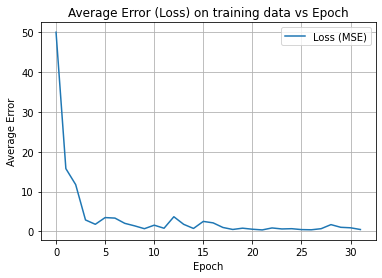

In [ ]:
# plt.plot(history.history['mean_squared_error'], label='train mse')
plt.plot(history.history['loss'], label='Loss (MSE)')
# plt.plot(history.history['val_mean_squared_error'], label='val mse')

plt.title('Average Error (Loss) on training data vs Epoch')
plt.ylabel('Average Error')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

## Scatter plot (Model output vs Desired output)

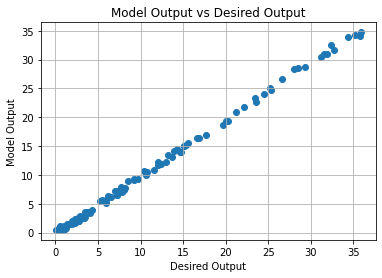

In [ ]:
y_pred=model.predict(X_test)
plt.scatter(x = y_test, y = y_pred)
plt.ylabel('Model Output')
plt.xlabel('Desired Output')
plt.title('Model Output vs Desired Output')
plt.grid()

## Plots of the desired function 

In [ ]:
def plot_desired_function_surface():
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')

    x = np.array(data['x1'])
    y = np.array(data['x2'])
    z = np.array(data['y'])

    # surf = ax.plot_trisurf(x, y, z,cmap='viridis',linewidth=0.01)
    surf = ax.plot_trisurf(x, y, z, cmap=plt.cm.jet, linewidth=0.01)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    # ax.view_init(30, 45)
    title = 'Plot of the desired function'# after epoch ' #+ str(epoch)  #after complete training''
    ax.set_title(title)
    ax.set_zlabel('y')
    plt.xlabel('x1')
    plt.ylabel('x2')
    # u='hidden_2_node'+str(node+1)+'_'+str(epoch)+'.png'
    # plt.savefig(u)
    plt.show()
    # files.download(u)

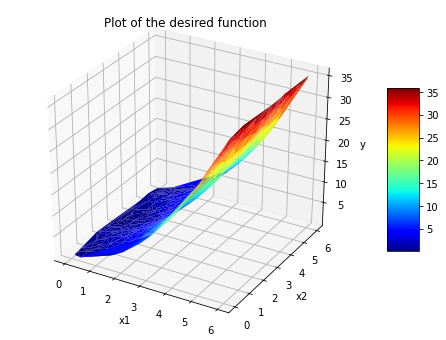

In [ ]:
plot_desired_function_surface()

## Plot of the approximated function after different epochs

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from google.colab import files

x_temp = np.linspace(0, 6, 100)
y_temp = np.linspace(0, 6, 100)
xv, yv = np.meshgrid(x_temp, y_temp)

x, y, temp = [], [], []
for i in range(100):
  for j in range(100):
    x.append(xv[i][j])
    y.append(yv[i][j])
    temp.append([xv[i][j], yv[i][j]])

temp = np.array(temp)

def plot_approximated_function_surface():
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')

    z_predict = model.predict(temp)
    z = np.array([ele[0] for ele in z_predict])

    # surf = ax.plot_trisurf(x, y, z,cmap='viridis',linewidth=0.01)
    surf = ax.plot_trisurf(x, y, z, cmap=plt.cm.jet, linewidth=0.01)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    # ax.view_init(30, 45)
    num_epochs = 50
    title = 'Plot of the approximated function after ' + str(num_epochs) + ' epochs'
    ax.set_title(title)
    ax.set_zlabel('y')
    plt.xlabel('x1')
    plt.ylabel('x2')
    # u='hidden_2_node'+str(node+1)+'_'+str(epoch)+'.png'
    # plt.savefig(u)
    plt.show()
    # files.download(u)

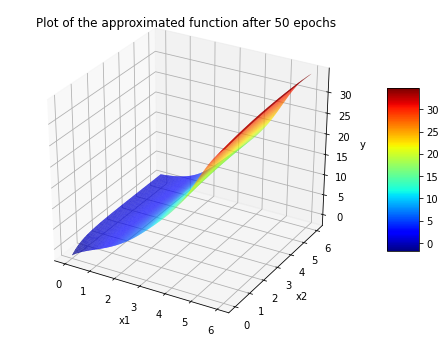

In [ ]:
plot_approximated_function_surface()